# Transformaciones de Variables

Cargamos los datos

In [225]:
import pandas as pd # type: ignore
ds_path = "data/train.csv"
na_values = [
    "", 
    "#N/A", 
    "#N/A N/A", 
    "#NA", 
    "-1.#IND", 
    "-1.#QNAN", 
    "-NaN", 
    "-nan", 
    "1.#IND", 
    "1.#QNAN", 
    "<NA>", 
    "N/A", 
    # "NA", 
    "NULL", 
    "NaN", 
    "n/a", 
    "nan", 
    "null",
]
# Se usan los parámetros na_values y keep_default_valures de acuerdo
# a lo especificado aquí: https://stackoverflow.com/a/66715400
# Esto se realiza porque existen valores NA en el dataset que son reconocidos como nulos.
# Investigando en data_description.txt también vemos que estos valores son efectivamente válidos para
# ciertas columnas.
df = pd.read_csv(ds_path, delimiter=",", na_values=na_values, keep_default_na=False)

In [226]:

df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
5,6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75,10084,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,307000
7,8,60,RL,NA,10382,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51,6120,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50,7420,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,1,2008,WD,Normal,118000


Visualizamos los features y tipos de datos

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

Aprovechamos para eliminar la columna ID, la cual se trata de una columna de identificadores y no aporta información útil al modelo

In [228]:
df = df.drop("Id", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotFrontage    1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   Alley          1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null

Analizamos las estadisticas descriptivas del df

In [229]:
from utils.eda import get_descriptive_statistics
get_descriptive_statistics(df).T

,min,max,mean,std,median,variation_coefficient
MSSubClass,20.0,190.0,56.897260,42.300571,50.0,0.743455
LotArea,1300.0,215245.0,10516.828082,9981.264932,9478.5,0.949076
OverallQual,1.0,10.0,6.099315,1.382997,6.0,0.226746
OverallCond,1.0,9.0,5.575342,1.112799,5.0,0.199593
YearBuilt,1872.0,2010.0,1971.267808,30.202904,1973.0,0.015322
YearRemodAdd,1950.0,2010.0,1984.865753,20.645407,1994.0,0.010401
BsmtFinSF1,0.0,5644.0,443.639726,456.098091,383.5,1.028082
BsmtFinSF2,0.0,1474.0,46.549315,161.319273,0.0,3.465556
BsmtUnfSF,0.0,2336.0,567.240411,441.866955,477.5,0.778977
TotalBsmtSF,0.0,6110.0,1057.429452,438.705324,991.5,0.414879


Buscamos si existen valores nulos

In [230]:
from utils.eda import get_nulll_data_info
get_nulll_data_info(df)

,datos sin NAs en q,Na en q,Na en %
MSSubClass,1460,0,0.0
MSZoning,1460,0,0.0
LotFrontage,1460,0,0.0
LotArea,1460,0,0.0
Street,1460,0,0.0
...,...,...,...
MoSold,1460,0,0.0
YrSold,1460,0,0.0
SaleType,1460,0,0.0
SaleCondition,1460,0,0.0


No se observan valores nulos

Ahora procedemos a convertir las columnas booleanas

In [231]:
columns = df.columns.tolist()

columns_converted_to_boolean = []

potential_boolean_column_values = [
    [0, 1],
    [0.0, 1.0],
    ["false", "true"],
    ["no", "yes"],
    ["no", "si"],
    ["N", "Y"],
]


def _convert_value_to_boolean(x):
    if x in [0, 0.0, "false", "no", "no", "N"]:
        return False

    if x in [1, 1.0, "true", "yes", "si", "Y"]:
        return True

    return x


for column in columns:
    unique_values = df[column].dropna().unique()

    boolean_column_found = False

    if len(unique_values) == 2:
        print(f"Values in column '{column}': {str(unique_values)}")

        for possible_boolean_values in potential_boolean_column_values:
            if set(unique_values) == set(possible_boolean_values):
                print(f"The column '{column}' is boolean. It will be converted.")
                df[column] = df[column].apply(_convert_value_to_boolean)
                df[column] = df[column].astype("bool")

                boolean_column_found = True
                break

    if boolean_column_found:
        columns_converted_to_boolean.append(column)


print(f"Columns converted to boolean: {str(columns_converted_to_boolean)}")


Values in column 'Street': ['Pave' 'Grvl']
Values in column 'Utilities': ['AllPub' 'NoSeWa']
Values in column 'CentralAir': ['Y' 'N']
The column 'CentralAir' is boolean. It will be converted.
Columns converted to boolean: ['CentralAir']


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotFrontage    1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   Alley          1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null

Analizamos las columnas que no poseen valores muy claros

In [233]:
for column in ["LotFrontage", "MasVnrArea", "GarageYrBlt"]:
    no_num_value = []

    for el in df.loc[:, column]:
        try:
            int(el)
        except ValueError:
            no_num_value.append(el)
    no_num_value = list(set(no_num_value))
    print(f"Valores no numéricos para columna '{column}': {str(no_num_value)}")

Valores no numéricos para columna 'LotFrontage': ['NA']
Valores no numéricos para columna 'MasVnrArea': ['NA']
Valores no numéricos para columna 'GarageYrBlt': ['NA']


Convertimos a Nan

In [234]:
def _convertir_NA_a_Nan(x):
    if x == "NA":
        return pd.NA

    return int(x)


for column in ["LotFrontage", "MasVnrArea", "GarageYrBlt"]:
    df[column] = df[column].apply(_convertir_NA_a_Nan).astype("Int64")

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotFrontage    1201 non-null   Int64 
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   Alley          1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null

Convertimos las columnas categoricas

In [236]:
categorical_column = df.select_dtypes(include=["object", "string"]).columns.tolist()


for columna in categorical_column:
    valores_unicos = df[columna].dropna().unique().tolist()
    print(f"Valores únicos para columna '{columna}': {str(valores_unicos)}")

Valores únicos para columna 'MSZoning': ['RL', 'RM', 'C (all)', 'FV', 'RH']
Valores únicos para columna 'Street': ['Pave', 'Grvl']
Valores únicos para columna 'Alley': ['NA', 'Grvl', 'Pave']
Valores únicos para columna 'LotShape': ['Reg', 'IR1', 'IR2', 'IR3']
Valores únicos para columna 'LandContour': ['Lvl', 'Bnk', 'Low', 'HLS']
Valores únicos para columna 'Utilities': ['AllPub', 'NoSeWa']
Valores únicos para columna 'LotConfig': ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
Valores únicos para columna 'LandSlope': ['Gtl', 'Mod', 'Sev']
Valores únicos para columna 'Neighborhood': ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste']
Valores únicos para columna 'Condition1': ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe']
Valores únicos para columna

Convertimos las columnas a categorica o cadena de acuerdo al porcentaje de valores unicos en comparación al total

In [237]:
max_categorical_columns_percentage = 0.05
num_rows_df = df.shape[0]
columns_to_exclude = []
columns_converted_to_categorical = []
columns_converted_to_string = []

for column in categorical_column:
    unique_values = df[column].dropna().unique().tolist()
    if len(unique_values) <= (max_categorical_columns_percentage * num_rows_df):
        
        print(f"Valores unicos en columna '{column}': {str(unique_values)}")
        print(f"Convertir '{column}' a categorical")
        df[column] = df[column].astype("category")
        columns_converted_to_categorical.append(column)
    else:
        print(f"Column '{column}' No se convierte a categorica, se conserva cómo string")
        df[column] = df[column].astype("string")
        columns_converted_to_string.append(column)

    del unique_values



Valores unicos en columna 'MSZoning': ['RL', 'RM', 'C (all)', 'FV', 'RH']
Convertir 'MSZoning' a categorical
Valores unicos en columna 'Street': ['Pave', 'Grvl']
Convertir 'Street' a categorical
Valores unicos en columna 'Alley': ['NA', 'Grvl', 'Pave']
Convertir 'Alley' a categorical
Valores unicos en columna 'LotShape': ['Reg', 'IR1', 'IR2', 'IR3']
Convertir 'LotShape' a categorical
Valores unicos en columna 'LandContour': ['Lvl', 'Bnk', 'Low', 'HLS']
Convertir 'LandContour' a categorical
Valores unicos en columna 'Utilities': ['AllPub', 'NoSeWa']
Convertir 'Utilities' a categorical
Valores unicos en columna 'LotConfig': ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
Convertir 'LotConfig' a categorical
Valores unicos en columna 'LandSlope': ['Gtl', 'Mod', 'Sev']
Convertir 'LandSlope' a categorical
Valores unicos en columna 'Neighborhood': ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR',

In [238]:
get_descriptive_statistics(df).T    

,min,max,mean,std,median,variation_coefficient
MSSubClass,20.0,190.0,56.897260,42.300571,50.0,0.743455
LotFrontage,21.0,313.0,70.049958,24.284752,69.0,0.346678
LotArea,1300.0,215245.0,10516.828082,9981.264932,9478.5,0.949076
OverallQual,1.0,10.0,6.099315,1.382997,6.0,0.226746
OverallCond,1.0,9.0,5.575342,1.112799,5.0,0.199593
YearBuilt,1872.0,2010.0,1971.267808,30.202904,1973.0,0.015322
YearRemodAdd,1950.0,2010.0,1984.865753,20.645407,1994.0,0.010401
MasVnrArea,0.0,1600.0,103.685262,181.066207,0.0,1.746306
BsmtFinSF1,0.0,5644.0,443.639726,456.098091,383.5,1.028082
BsmtFinSF2,0.0,1474.0,46.549315,161.319273,0.0,3.465556


Ahora evaluaremos los valores NA y su correspondencia con los datos

In [239]:
no_na_columns = []
possible_na_columns = [
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "HeatingQC",
    "KitchenQual",
    "Functional",
    "FireplaceQu",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    "PoolQC",
    "Fence",
    "Alley",
    "GarageType",
    "MiscFeature",
]
for column in categorical_column:
    unique_values = df[column].dropna().unique().tolist()
    unique_values = [x.lower() for x in unique_values]
    if ("na" in unique_values and (column not in possible_na_columns)):
        no_na_columns.append(column)


print(f"Columnas que poseen NA que no deberían poseer dicho valor de acuerdo a data_description.txt: {str(no_na_columns)}")

Columnas que poseen NA que no deberían poseer dicho valor de acuerdo a data_description.txt: ['MasVnrType', 'Electrical']


Limpiamos los valores na no esperados

In [240]:
def _clean_na(x):
    if x.lower() == "na":
        return pd.NA

    return x


for column in no_na_columns:
    df[column] = df[column].astype("string").apply(_clean_na).astype("category")

Limpiamos todas las columnas categoricas

In [241]:
from utils.eda import get_categoric_columns, clean_string
categoric_columns = get_categoric_columns(df)
for column in categoric_columns:
    df[column] = df[column].apply(clean_string)

Eliminamos los valores nulos de las columnas categoricas

In [242]:
for column in categoric_columns:
    unique_values = df[column].dropna().unique().tolist()
    print(f"Valores únicos para columna '{column}': {str(unique_values)}")

Valores únicos para columna 'MSZoning': ['rl', 'rm', 'c (all)', 'fv', 'rh']
Valores únicos para columna 'Street': ['pave', 'grvl']
Valores únicos para columna 'Alley': ['na', 'grvl', 'pave']
Valores únicos para columna 'LotShape': ['reg', 'ir1', 'ir2', 'ir3']
Valores únicos para columna 'LandContour': ['lvl', 'bnk', 'low', 'hls']
Valores únicos para columna 'Utilities': ['allpub', 'nosewa']
Valores únicos para columna 'LotConfig': ['inside', 'fr2', 'corner', 'culdsac', 'fr3']
Valores únicos para columna 'LandSlope': ['gtl', 'mod', 'sev']
Valores únicos para columna 'Neighborhood': ['collgcr', 'veenker', 'crawfor', 'noridge', 'mitchel', 'somerst', 'nwames', 'oldtown', 'brkside', 'sawyer', 'nridght', 'names', 'sawyerw', 'idotrr', 'meadowv', 'edwards', 'timber', 'gilbert', 'stonebr', 'clearcr', 'npkvill', 'blmngtn', 'brdale', 'swisu', 'blueste']
Valores únicos para columna 'Condition1': ['norm', 'feedr', 'posn', 'artery', 'rrae', 'rrnn', 'rran', 'posa', 'rrne']
Valores únicos para columna

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1201 non-null   Int64   
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   Alley          1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

Buscamos valores NAN

In [244]:
from utils.eda import get_nulll_data_info
null_stats = get_nulll_data_info(df)
print(null_stats)

               datos sin NAs en q  Na en q  Na en %
LotFrontage                  1201      259    17.74
GarageYrBlt                  1379       81     5.55
MasVnrArea                   1452        8     0.55
MasVnrType                   1452        8     0.55
Electrical                   1459        1     0.07
...                           ...      ...      ...
MoSold                       1460        0     0.00
YrSold                       1460        0     0.00
SaleType                     1460        0     0.00
SaleCondition                1460        0     0.00
SalePrice                    1460        0     0.00

[80 rows x 3 columns]


Observamos que existes muchos valores NAN

In [245]:
from utils.eda import get_descriptive_statistics

get_descriptive_statistics(df[["LotFrontage", "GarageYrBlt", "MasVnrArea", "MasVnrType", "Electrical"]]).T

,min,max,mean,std,median,variation_coefficient
LotFrontage,21.0,313.0,70.049958,24.284752,69.0,0.346678
GarageYrBlt,1900.0,2010.0,1978.506164,24.689725,1980.0,0.012479
MasVnrArea,0.0,1600.0,103.685262,181.066207,0.0,1.746306


Buscamos Valores NAN

In [246]:
df[(df["GarageYrBlt"].isna())][["GarageYrBlt", "GarageType", "YearBuilt"]]

,GarageYrBlt,GarageType,YearBuilt
39,<NA>,na,1955
48,<NA>,na,1920
78,<NA>,na,1968
88,<NA>,na,1915
89,<NA>,na,1994
...,...,...,...
1349,<NA>,na,1872
1407,<NA>,na,1985
1449,<NA>,na,1970
1450,<NA>,na,1974


Contabilizamos valores NAN

In [247]:
df[(df["GarageYrBlt"].isna()) & (df["GarageType"] != "na")][["GarageYrBlt", "GarageType", "YearBuilt"]].count()

GarageYrBlt    0
GarageType     0
YearBuilt      0
dtype: int64

Contabilizamos NAN

In [248]:
df[(df["GarageYrBlt"].isna()) & (df["YearBuilt"].isna())][["GarageYrBlt", "YearBuilt"]].count()

GarageYrBlt    0
YearBuilt      0
dtype: int64

Imputamos valores NAN

In [249]:
def _impute_null_values():
    lot_frontage_median = df["LotFrontage"].dropna().median()
    df["LotFrontage"] = df["LotFrontage"].apply(lambda x: x if not pd.isna(x) else lot_frontage_median)
    df["MasVnrArea"] = df["LotFrontage"].fillna(0)
    df["GarageYrBlt"] = df.apply(lambda x: x["YearBuilt"] if pd.isna(x["GarageYrBlt"]) else x["GarageYrBlt"], axis=1)
    df["MasVnrType"] = df["MasVnrType"].astype("string").fillna("unk").astype("category")
    df["Electrical"] = df["MasVnrType"].astype("string").fillna("unk").astype("category")


_impute_null_values()

In [250]:
get_nulll_data_info(df[["GarageYrBlt", "YearBuilt"]])

,datos sin NAs en q,Na en q,Na en %
GarageYrBlt,1460,0,0.0
YearBuilt,1460,0,0.0


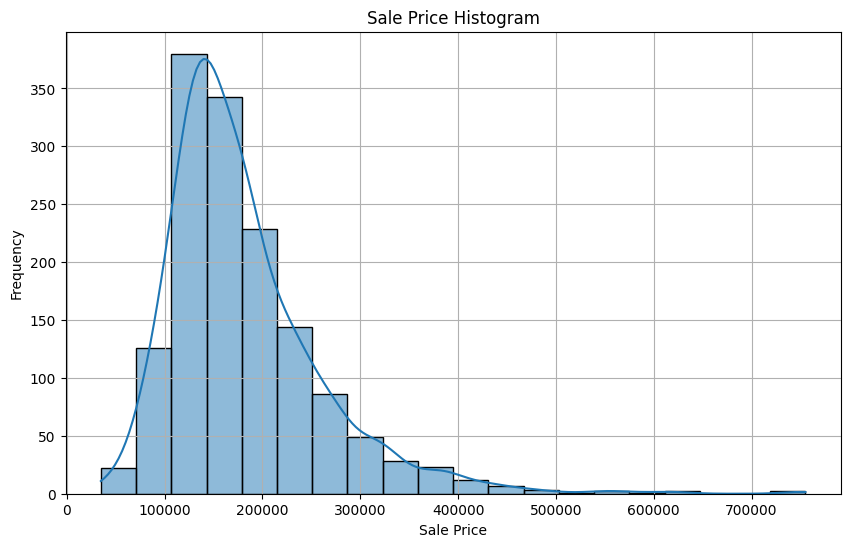

In [251]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='SalePrice', kde=True, bins=20)
plt.title('Sale Price Histogram')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Se observa un sesgo a la izquierda

In [252]:
from utils.eda import get_numeric_columns
numeric_columns = get_numeric_columns(df)

Gŕaficamos la distribución de los valores numéricos

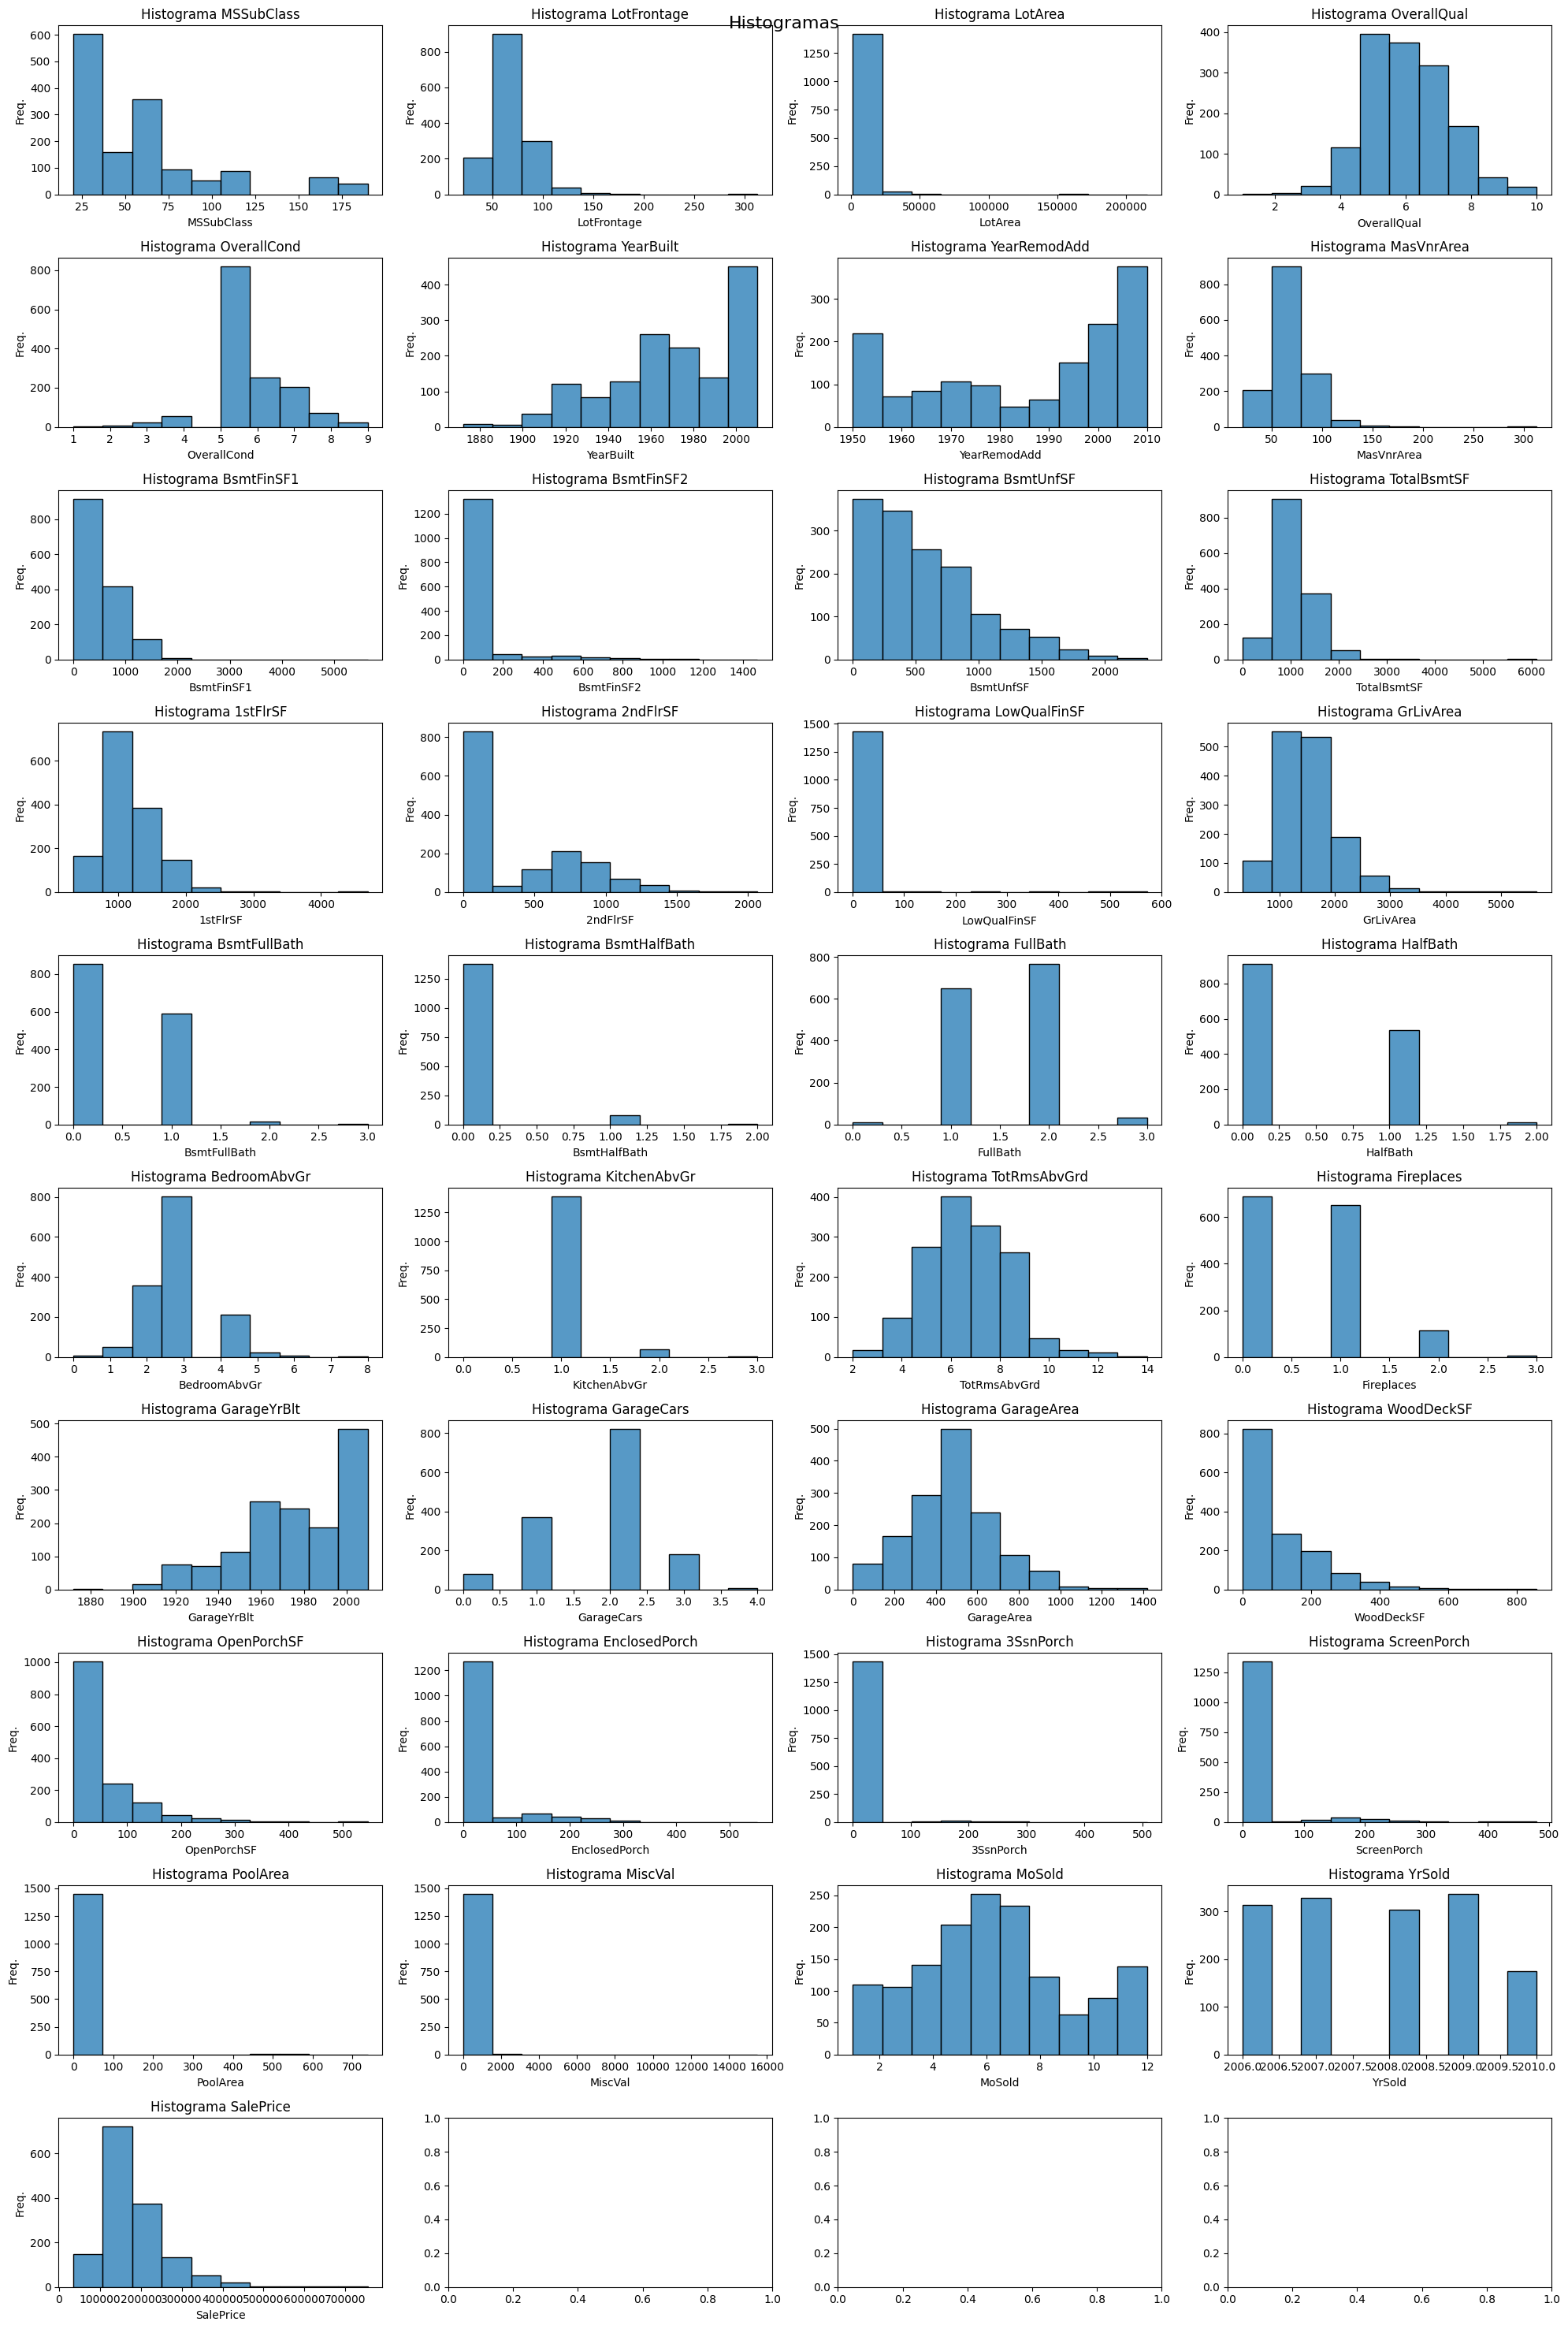

In [253]:
from utils.eda import graph_histogram
graph_histogram(df, numeric_columns, columns_number=4, bins=10, figsize=(20, 30))

Observamos la gráfica de cajas

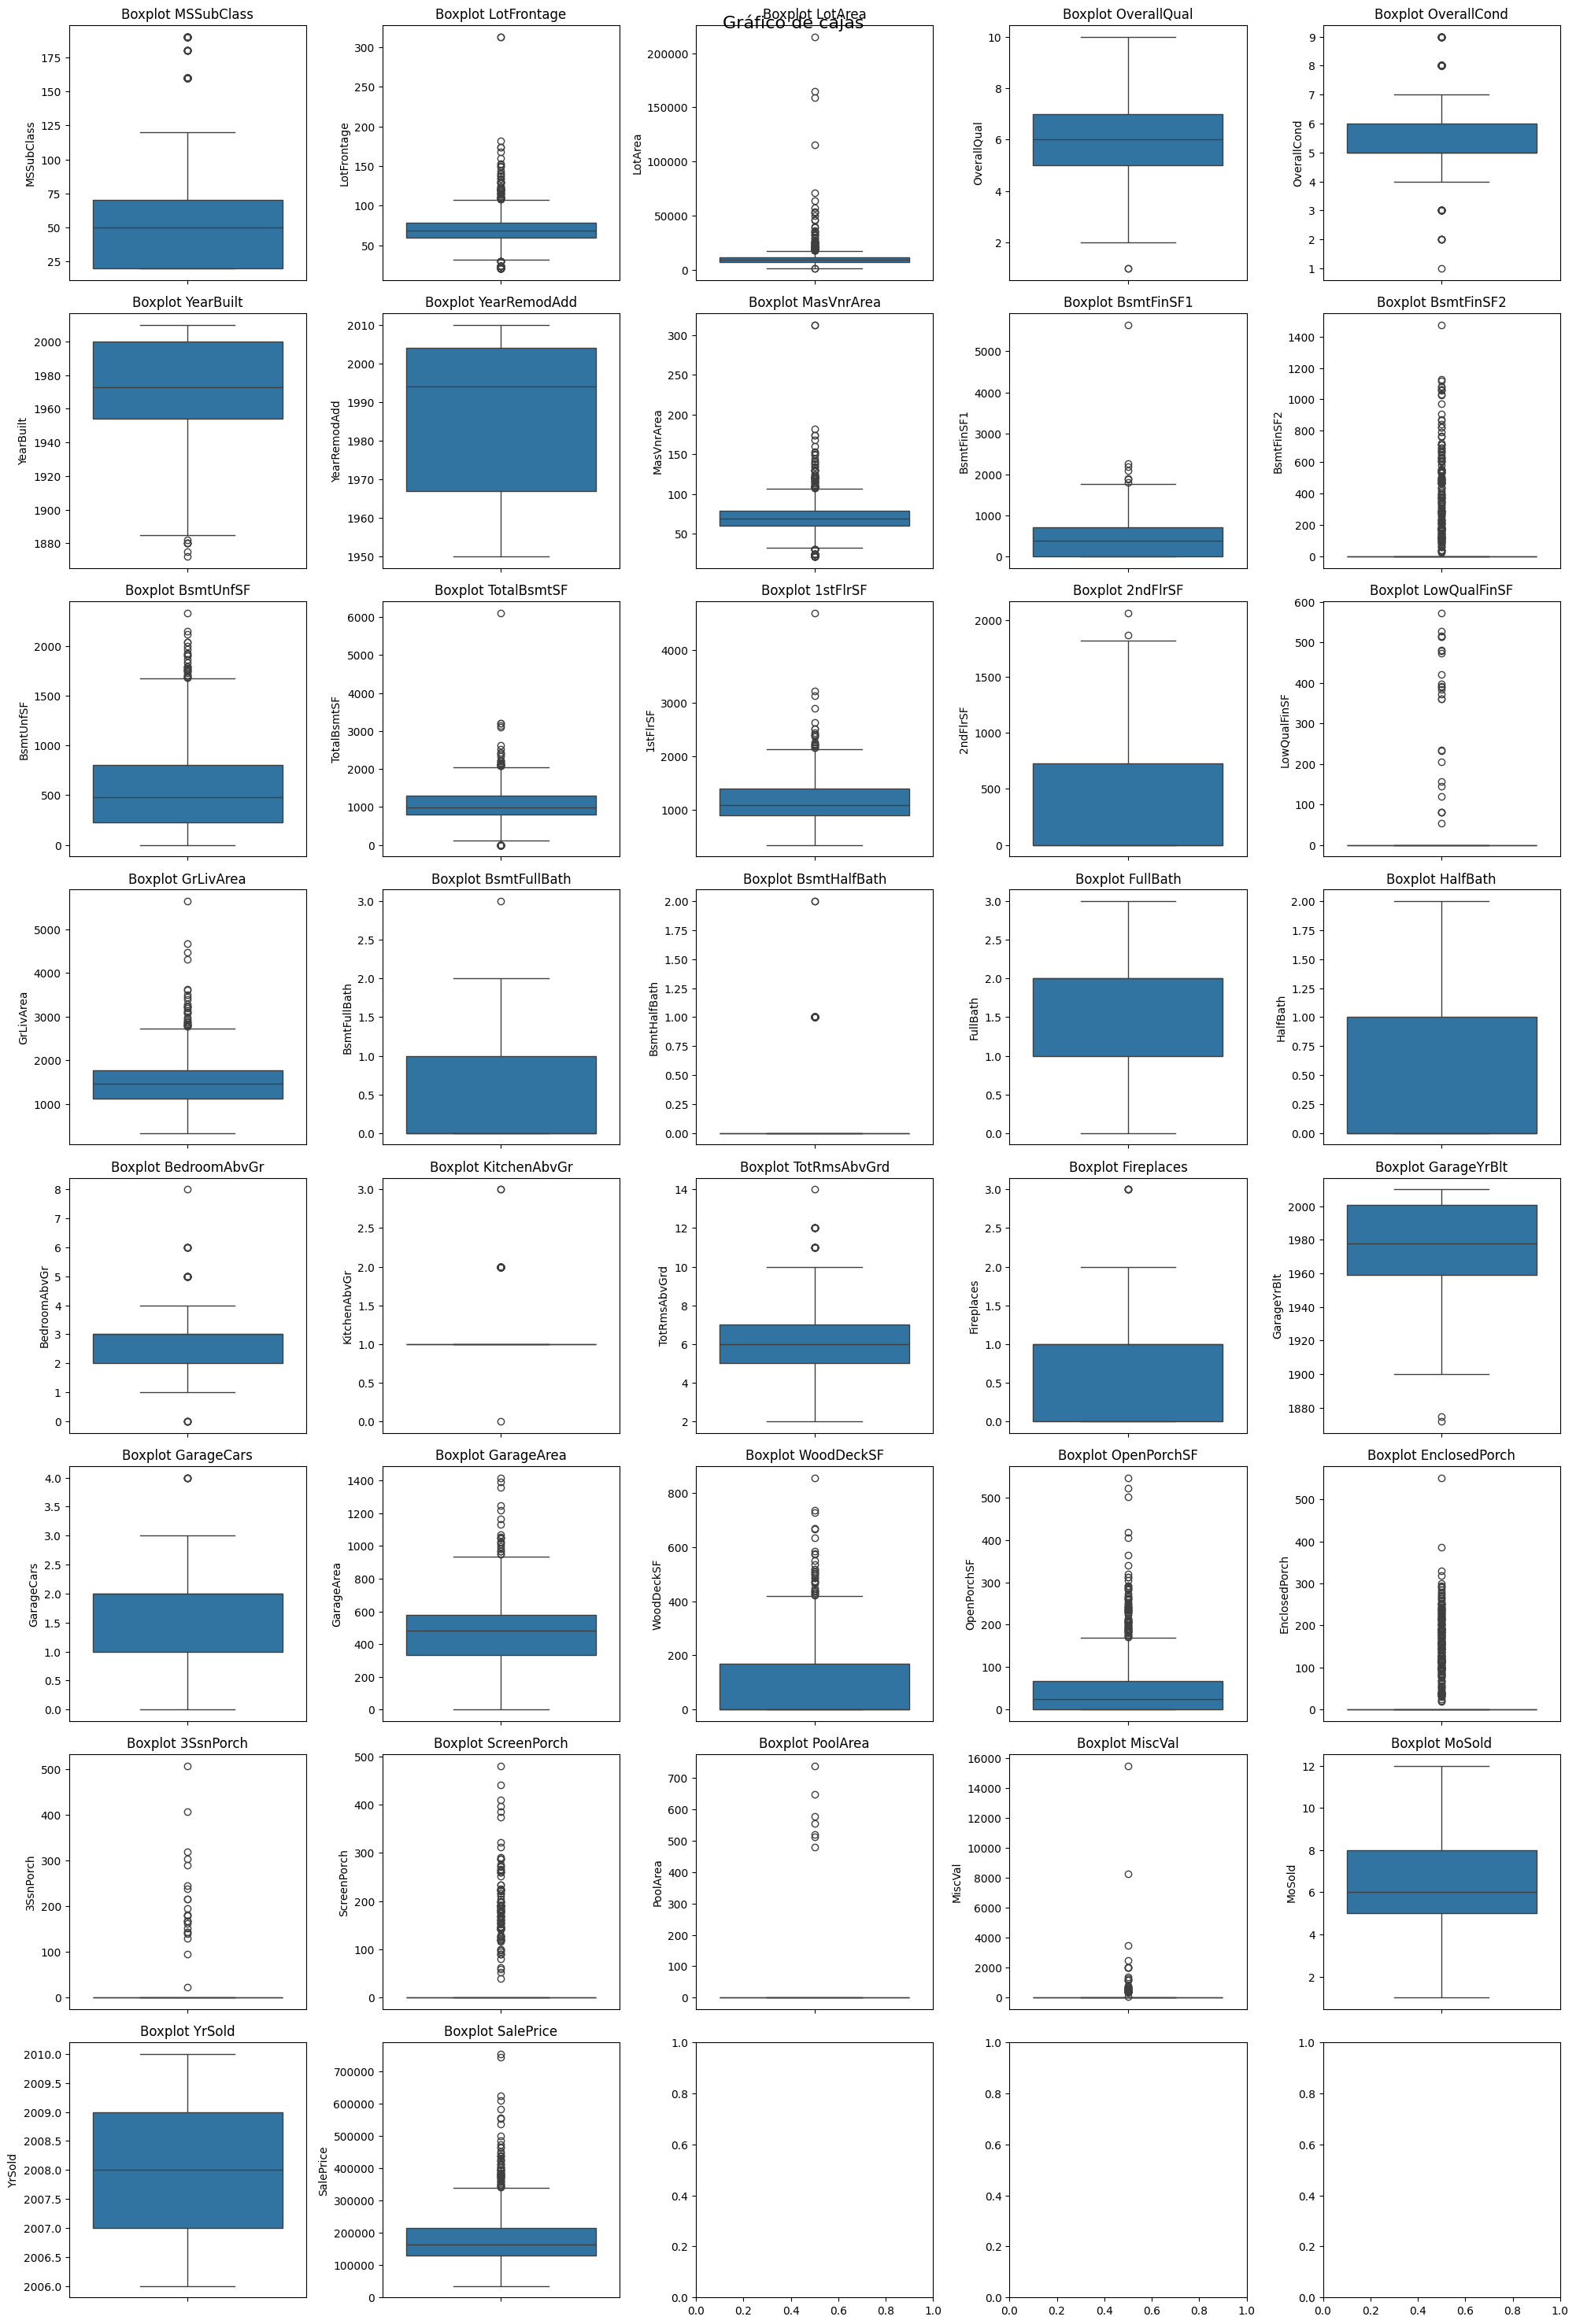

In [254]:
from utils.eda import graph_boxplot
graph_boxplot(df, numeric_columns, num_columns=5, figsize=(20,30))

Filtramos los datos a visualizar en la correlación para hacer la visualizacion más sencilla

In [255]:
from utils.eda import get_numeric_columns
selected_columns = ['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']
corr_matrix = df[selected_columns].corr(method="pearson")
spearmann = df[selected_columns].corr(method="spearman")
kendall = df[selected_columns].corr(method="kendall")
corr_matrix

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
LotFrontage,1.000000,0.304522,0.234812,0.116685,0.083348,1.000000,0.214367,0.124098,0.363472,0.413773,...,-0.004905,0.320518,0.233221,0.088433,0.269539,0.323511,0.075542,0.137014,0.010287,0.037655
LotArea,0.304522,1.000000,0.105806,0.014228,0.013788,0.304522,0.214103,-0.002618,0.260833,0.299475,...,-0.017784,0.190015,0.271364,0.003669,0.154871,0.180403,0.171698,0.084774,-0.018340,0.043160
OverallQual,0.234812,0.105806,1.000000,0.572323,0.550684,0.234812,0.239666,0.308159,0.537808,0.476224,...,-0.183882,0.427452,0.396765,0.555022,0.600671,0.562022,0.238923,0.308819,-0.113937,0.064886
YearBuilt,0.116685,0.014228,0.572323,1.000000,0.592855,0.116685,0.249503,0.149040,0.391452,0.281986,...,-0.174800,0.095589,0.147716,0.845141,0.537850,0.478954,0.224880,0.188686,-0.387268,-0.050364
YearRemodAdd,0.083348,0.013788,0.550684,0.592855,1.000000,0.083348,0.128451,0.181133,0.291066,0.240379,...,-0.149598,0.191740,0.112581,0.604353,0.420622,0.371600,0.205726,0.226298,-0.193919,-0.038740
MasVnrArea,1.000000,0.304522,0.234812,0.116685,0.083348,1.000000,0.214367,0.124098,0.363472,0.413773,...,-0.004905,0.320518,0.233221,0.088433,0.269539,0.323511,0.075542,0.137014,0.010287,0.037655
BsmtFinSF1,0.214367,0.214103,0.239666,0.249503,0.128451,0.214367,1.000000,-0.495251,0.522396,0.445863,...,-0.081007,0.044316,0.260011,0.184657,0.224054,0.296970,0.204306,0.111761,-0.102303,0.062021
BsmtUnfSF,0.124098,-0.002618,0.308159,0.149040,0.181133,0.124098,-0.495251,1.000000,0.415360,0.317987,...,0.030086,0.250647,0.051575,0.175605,0.214175,0.183303,-0.005316,0.129005,-0.002538,-0.012579
TotalBsmtSF,0.363472,0.260833,0.537808,0.391452,0.291066,0.363472,0.522396,0.415360,1.000000,0.819530,...,-0.068901,0.285573,0.339519,0.345936,0.434585,0.486665,0.232019,0.247264,-0.095478,0.084489
1stFlrSF,0.413773,0.299475,0.476224,0.281986,0.240379,0.413773,0.445863,0.317987,0.819530,1.000000,...,0.068101,0.409516,0.410531,0.265777,0.439317,0.489782,0.235459,0.211671,-0.065292,0.088758


Graficamos nuestro mapa de calor de la matriz correlación

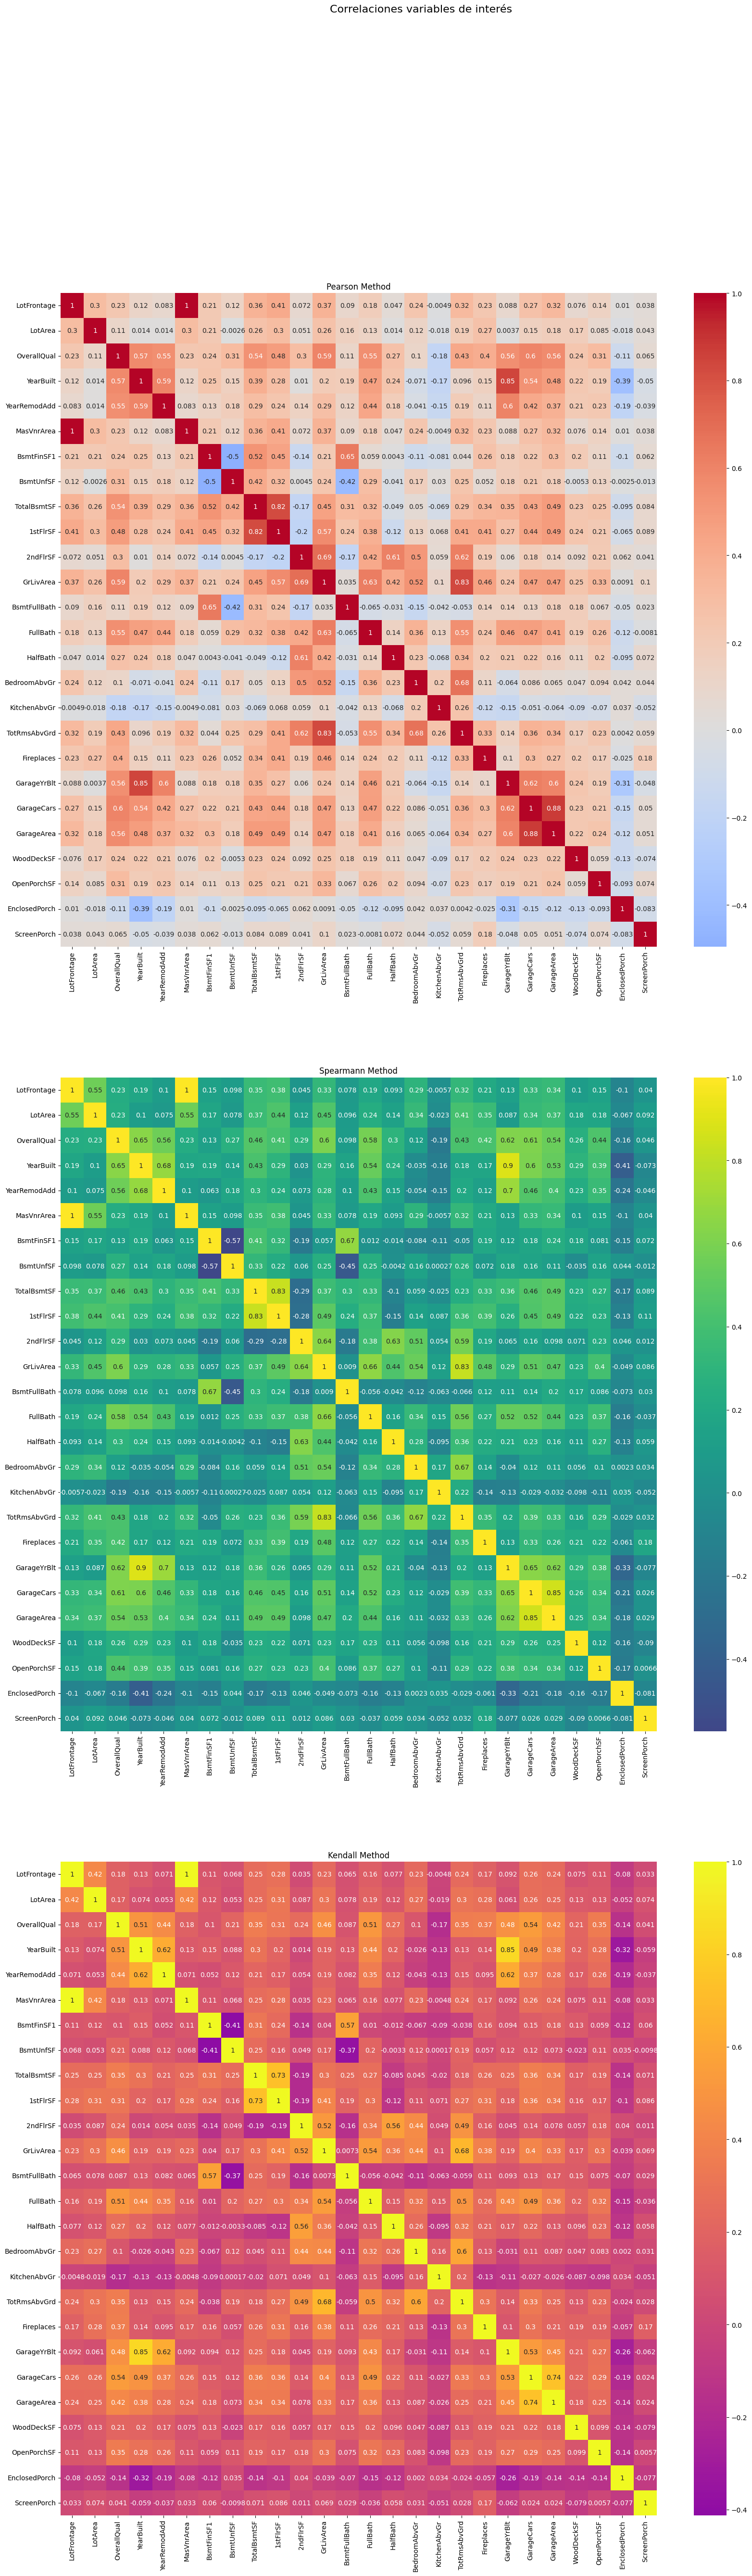

In [256]:
from utils.eda import graph_correlations
graph_correlations(corr_matrix, spearmann, kendall, "Correlaciones variables de interés", figsize= (20,60))

In [257]:
skewness = df[numeric_columns].skew()

# Definir un umbral para considerar una columna como sesgada
threshold = 0.5  # Puedes ajustar el valor según tus necesidades

# Filtrar las columnas sesgadas
skewness_column = skewness[skewness.abs() > threshold].index

print("Columnas sesgadas:", list(skewness_column))

Columnas sesgadas: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


In [258]:
skewness_column = [*skewness_column]
skewness_column.remove("SalePrice")

Importar librerias para trabajar con el modelo y las transformaciones

In [259]:
import numpy as np
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, RobustScaler, OrdinalEncoder, OneHotEncoder, PolynomialFeatures
import lightgbm as lgb

In [260]:
output_field = "SalePrice"

prediction_columns = df.columns.tolist()
prediction_columns.remove("SalePrice")
numeric_columns.remove("SalePrice")

X = df[[*prediction_columns]]
y = df[output_field]


mapeamos nuestras columnas a transformar

In [261]:
ordinal_column_map = [
    {
        "col": "ExterCond",
        "mapping": [
            "po",
            "fa",
            "ta",
            "gd",
            "ex",
        ]
    },
    {
        "col": "ExterQual",
        "mapping": [
            "po",
            "fa",
            "ta",
            "gd",
            "ex",
        ]
    },
    {
        "col": "BsmtCond",
        "mapping": [
            "na",
            "po",
            "fa",
            "ta",
            "gd",
            "ex",
        ]
    },
    {
        "col": "BsmtExposure",
        "mapping": [
            "na",
            "no",
            "mn",
            "av",
            "gd",
        ]
    },
    {
        "col": "BsmtFinType1",
        "mapping": [
            "na",
            "unf",
            "lwq",
            "rec",
            "blq",
            "alq",
            "glq",
        ]
    },
    {
        "col": "BsmtFinType2",
        "mapping": [
            "na",
            "unf",
            "lwq",
            "rec",
            "blq",
            "alq",
            "glq",
        ]
    },
    {
        "col": "HeatingQC",
        "mapping": [
            "po",
            "fa",
            "ta",
            "gd",
            "ex",
        ]
    },
    {
        "col": "KitchenQual",
        "mapping": [
            "po",
            "fa",
            "ta",
            "gd",
            "ex",
        ]
    },
    {
        "col": "Functional",
        "mapping": [
            "sal",
            "sev",
            "maj2",
            "maj1",
            "mod",
            "min2",
            "min1",
            "typ",
        ]
    },
    {
        "col": "FireplaceQu",
        "mapping": [
            "na",
            "po",
            "fa",
            "ta",
            "gd",
            "ex",
        ]
    },
    {
        "col": "GarageFinish",
        "mapping": [
            "na",
            "unf",
            "rfn",
            "fin",
        ]
    },
    {
        "col": "GarageQual",
        "mapping": [
            "na",
            "po",
            "fa",
            "ta",
            "gd",
            "ex",
        ]
    },
    {
        "col": "GarageCond",
        "mapping": [
            "na",
            "po",
            "fa",
            "ta",
            "gd",
            "ex",
        ]
    },
    {
        "col": "PoolQC",
        "mapping": [
            "na",
            "po",
            "fa",
            "ta",
            "gd",
            "ex",
        ]
    },
    {
        "col": "Fence",
        "mapping": [
            "na",
            "mnww",
            "gdwo",
            "mnprv",
            "gdprv",
        ]
    },
]

In [262]:
skewed_columns_excluding_lot_area = [*skewness_column]
skewed_columns_excluding_lot_area.remove("LotArea")


Convertimos a OneHot

In [263]:
categories_ordinal_encoder = []
ordinal_encoder_columns = []

# Prepare parameters for the Ordinal Encoder.
for column_mapping in ordinal_column_map:
    column_name = column_mapping["col"]

    if column_name in prediction_columns:
        mapping_columns = column_mapping["mapping"]

        categories_ordinal_encoder.append(mapping_columns)
        ordinal_encoder_columns.append(column_name)

categorical_columns = get_categoric_columns(df)

categorical_columns_to_convert_onehot = []

# Extract only the columns that need to be converted to one-hot,
# excluding the ordinal columns.
for column in categorical_columns:
    if column not in ordinal_encoder_columns and column in prediction_columns:
        categorical_columns_to_convert_onehot.append(column)


print(categories_ordinal_encoder)
print(ordinal_encoder_columns)
print(categorical_columns_to_convert_onehot)


[['po', 'fa', 'ta', 'gd', 'ex'], ['po', 'fa', 'ta', 'gd', 'ex'], ['na', 'po', 'fa', 'ta', 'gd', 'ex'], ['na', 'no', 'mn', 'av', 'gd'], ['na', 'unf', 'lwq', 'rec', 'blq', 'alq', 'glq'], ['na', 'unf', 'lwq', 'rec', 'blq', 'alq', 'glq'], ['po', 'fa', 'ta', 'gd', 'ex'], ['po', 'fa', 'ta', 'gd', 'ex'], ['sal', 'sev', 'maj2', 'maj1', 'mod', 'min2', 'min1', 'typ'], ['na', 'po', 'fa', 'ta', 'gd', 'ex'], ['na', 'unf', 'rfn', 'fin'], ['na', 'po', 'fa', 'ta', 'gd', 'ex'], ['na', 'po', 'fa', 'ta', 'gd', 'ex'], ['na', 'po', 'fa', 'ta', 'gd', 'ex'], ['na', 'mnww', 'gdwo', 'mnprv', 'gdprv']]
['ExterCond', 'ExterQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', '

In [264]:
skewed_columns_excluding_lot_area = [*skewness_column]
skewed_columns_excluding_lot_area.remove("LotArea")

Seteamos los transformers

In [265]:
def log_feature_names(transformer, feature_names):
    return [f'log_{col}' for col in feature_names]


def poly_feature_names(transformer, feature_names):
    return [f'log_{col}' for col in feature_names]


polynomial_log_transformer = Pipeline(
    steps=[
        ("pol", PolynomialFeatures(degree=2, include_bias=False)),
        ("log", FunctionTransformer(np.log1p, validate=True, feature_names_out=log_feature_names))
    ]
)


log_transformer = ColumnTransformer(
    transformers=[
        ("regular_log", FunctionTransformer(np.log1p, validate=True, feature_names_out=log_feature_names), skewed_columns_excluding_lot_area),
        ("pol_log", polynomial_log_transformer, ["LotArea"]),
        
    ],
    remainder="passthrough"
)

scaler = Pipeline(steps=[
    ("log", log_transformer),
    ("scaler", RobustScaler())
])

preprocessor_no_transform = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), numeric_columns),
        ("ordinal", OrdinalEncoder(categories=categories_ordinal_encoder), ordinal_encoder_columns),
        ("onehot",  OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns_to_convert_onehot),
    ],
    remainder="passthrough",
     force_int_remainder_cols=False
)


preprocessor_transform = ColumnTransformer(
    transformers=[
        ("num", scaler, numeric_columns),
        ("ordinal", OrdinalEncoder(categories=categories_ordinal_encoder), ordinal_encoder_columns),
        ("onehot",  OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns_to_convert_onehot),
    ],
    remainder="passthrough",
     force_int_remainder_cols=False
)

Transformamos los valores numéricos

In [266]:
X_transf_no_transform = preprocessor_no_transform.fit_transform(X)

df_transf_no_transform = pd.DataFrame(X_transf_no_transform, columns=preprocessor_no_transform.get_feature_names_out())

df_transf_no_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 237 entries, num__MSSubClass to remainder__CentralAir
dtypes: float64(237)
memory usage: 2.6 MB


lista de columnas númericas transformadas

In [267]:
df_transf_no_transform.columns.tolist()

['num__MSSubClass',
 'num__LotFrontage',
 'num__LotArea',
 'num__OverallQual',
 'num__OverallCond',
 'num__YearBuilt',
 'num__YearRemodAdd',
 'num__MasVnrArea',
 'num__BsmtFinSF1',
 'num__BsmtFinSF2',
 'num__BsmtUnfSF',
 'num__TotalBsmtSF',
 'num__1stFlrSF',
 'num__2ndFlrSF',
 'num__LowQualFinSF',
 'num__GrLivArea',
 'num__BsmtFullBath',
 'num__BsmtHalfBath',
 'num__FullBath',
 'num__HalfBath',
 'num__BedroomAbvGr',
 'num__KitchenAbvGr',
 'num__TotRmsAbvGrd',
 'num__Fireplaces',
 'num__GarageYrBlt',
 'num__GarageCars',
 'num__GarageArea',
 'num__WoodDeckSF',
 'num__OpenPorchSF',
 'num__EnclosedPorch',
 'num__3SsnPorch',
 'num__ScreenPorch',
 'num__PoolArea',
 'num__MiscVal',
 'num__MoSold',
 'num__YrSold',
 'ordinal__ExterCond',
 'ordinal__ExterQual',
 'ordinal__BsmtCond',
 'ordinal__BsmtExposure',
 'ordinal__BsmtFinType1',
 'ordinal__BsmtFinType2',
 'ordinal__HeatingQC',
 'ordinal__KitchenQual',
 'ordinal__Functional',
 'ordinal__FireplaceQu',
 'ordinal__GarageFinish',
 'ordinal__Gara

Aplicamos preprocesadores

In [268]:
X_transf = preprocessor_transform.fit_transform(X)

df_transf = pd.DataFrame(X_transf, columns=preprocessor_transform.get_feature_names_out())

df_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 238 entries, num__regular_log__log_MSSubClass to remainder__CentralAir
dtypes: float64(238)
memory usage: 2.7 MB


Observamos nuestro df transformado

In [269]:
df_transf.columns.tolist()

['num__regular_log__log_MSSubClass',
 'num__regular_log__log_LotFrontage',
 'num__regular_log__log_OverallCond',
 'num__regular_log__log_YearBuilt',
 'num__regular_log__log_YearRemodAdd',
 'num__regular_log__log_MasVnrArea',
 'num__regular_log__log_BsmtFinSF1',
 'num__regular_log__log_BsmtFinSF2',
 'num__regular_log__log_BsmtUnfSF',
 'num__regular_log__log_TotalBsmtSF',
 'num__regular_log__log_1stFlrSF',
 'num__regular_log__log_2ndFlrSF',
 'num__regular_log__log_LowQualFinSF',
 'num__regular_log__log_GrLivArea',
 'num__regular_log__log_BsmtFullBath',
 'num__regular_log__log_BsmtHalfBath',
 'num__regular_log__log_HalfBath',
 'num__regular_log__log_KitchenAbvGr',
 'num__regular_log__log_TotRmsAbvGrd',
 'num__regular_log__log_Fireplaces',
 'num__regular_log__log_GarageYrBlt',
 'num__regular_log__log_WoodDeckSF',
 'num__regular_log__log_OpenPorchSF',
 'num__regular_log__log_EnclosedPorch',
 'num__regular_log__log_3SsnPorch',
 'num__regular_log__log_ScreenPorch',
 'num__regular_log__log_Poo

Observamos los valores descriptivos de nuestro df transformado

In [270]:
df_transf.describe()

,num__regular_log__log_MSSubClass,num__regular_log__log_LotFrontage,num__regular_log__log_OverallCond,num__regular_log__log_YearBuilt,num__regular_log__log_YearRemodAdd,num__regular_log__log_MasVnrArea,num__regular_log__log_BsmtFinSF1,num__regular_log__log_BsmtFinSF2,num__regular_log__log_BsmtUnfSF,num__regular_log__log_TotalBsmtSF,...,onehot__SaleType_new,onehot__SaleType_oth,onehot__SaleType_wd,onehot__SaleCondition_abnorml,onehot__SaleCondition_adjland,onehot__SaleCondition_alloca,onehot__SaleCondition_family,onehot__SaleCondition_normal,onehot__SaleCondition_partial,remainder__CentralAir
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1.460000e+03,1460.000000,1460.000000,1.460000e+03,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,-0.092789,-0.125555,0.502795,-0.042819,-0.249287,-0.125555,-2.621394e-01,0.655398,-0.406707,-3.060665e-01,...,0.083562,0.002055,0.867808,0.069178,0.002740,0.008219,0.013699,0.820548,0.085616,0.934932
std,0.565078,1.159476,1.092439,0.661710,0.559644,1.159476,4.554230e-01,1.845045,1.443769,2.342963e+00,...,0.276824,0.045299,0.338815,0.253844,0.052289,0.090317,0.116277,0.383862,0.279893,0.246731
min,-0.728398,-4.268637,-7.126873,-2.258280,-1.197341,-4.268637,-9.059506e-01,0.000000,-4.805231,-1.411085e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.728398,-0.507542,0.000000,-0.415866,-0.731561,-0.507542,-9.059506e-01,0.000000,-0.591055,-4.492543e-01,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.760001e-17,0.000000,0.000000,9.081277e-16,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.271602,0.492458,1.000000,0.584134,0.268439,0.492458,9.404942e-02,0.000000,0.408945,5.507457e-01,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.083971,5.535248,3.313807,0.798481,0.428860,5.535248,4.089271e-01,7.296413,1.235034,3.717000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Preparamos nuestro set de pruebas y entrenamiento

In [271]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
)

Buscamos diferentes valores de K para encontrar el que mejor desempeño tenga

In [272]:
# Probar diferentes valores de K
k_values = list(range(1, 21))
mse_scores = []

for k in k_values:
    knn_base = Pipeline(
        steps=[
            ("preprocessor", preprocessor_transform),
            ("model", KNeighborsRegressor(n_neighbors=k))
        ]
    )
    knn = TransformedTargetRegressor(
        regressor=knn_base,  # Modelo base
        func=np.log1p,  # Transformación logarítmica de y
        inverse_func=np.expm1  # Reconversión a escala original
    )
    scores = cross_val_score(knn, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
    mse_scores.append(scores.mean())

# Seleccionar el K con el menor MSE
best_k = k_values[mse_scores.index(max(mse_scores))]
print(f'Mejor valor de K: {best_k}')

Mejor valor de K: 4


Graficamos nuestra curva de mejor K

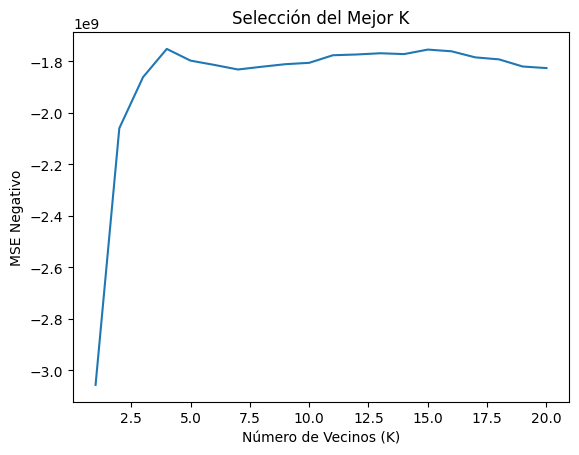

In [273]:
import matplotlib.pyplot as plt

plt.plot(k_values, mse_scores)
plt.xlabel('Número de Vecinos (K)')
plt.ylabel('MSE Negativo')
plt.title('Selección del Mejor K')
plt.show()

El mejor valor de K = 4

Entrenamos nuestro modelo KNN

In [274]:
knn_no_transform = Pipeline(
    steps=[
        ("preprocessor", preprocessor_no_transform),
        ("model", KNeighborsRegressor(n_neighbors=4))
    ]
)

knn_base_transform = Pipeline(
    steps=[
        ("preprocessor", preprocessor_transform),
        ("model", KNeighborsRegressor(n_neighbors=4))
    ]
)

knn = TransformedTargetRegressor(
    regressor=knn_base_transform,  # Modelo base
    func=np.log1p,  # Transformación logarítmica de y
    inverse_func=np.expm1  # Reconversión a escala original
)


knn_no_transform.fit(X_train, y_train)
knn.fit(X_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(force_int_remainder_cols=False,
                                                                        remainder='passthrough',
                                                                        transformers=[('num',
                                                                                       Pipeline(steps=[('log',
                                                                                                        ColumnTransformer(remainder='passthrough',
                                                                                                                          transformers=[('regular_log',
                                                                                                                                         FunctionTransformer(feature_names_out=<functi...
                                                                                        'LotShape',
                                                                                        'LandContour',
                                                                                        'Utilities',
                                                                                        'LotConfig',
                                                                                        'LandSlope',
                                                                                        'Neighborhood',
                                                                                        'Condition1',
                                                                                        'Condition2',
                                                                                        'BldgType',
                                                                                        'HouseStyle',
                                                                                        'RoofStyle',
                                                                                        'RoofMatl',
                                                                                        'Exterior1st',
                                                                                        'Exterior2nd',
                                                                                        'MasVnrType',
                                                                                        'Foundation',
                                                                                        'BsmtQual',
                                                                                        'Heating',
                                                                                        'Electrical',
                                                                                        'GarageType',
                                                                                        'PavedDrive',
                                                                                        'MiscFeature',
                                                                                        'SaleType',
                                                                                        'SaleCondition'])])),
                                                     ('model',
                                                      KNeighborsRegressor(n_neighbors=4))]))

Evaluamos las métricas de performance

In [275]:
# Realizar predicciones
y_pred_knn = knn.predict(X_test)
y_pred_knn_no_transform = knn_no_transform.predict(X_test)

# Evaluar el modelo
rmse_knn_no_transform = root_mean_squared_error(y_test, y_pred_knn_no_transform)
mse_knn_no_transform = rmse_knn_no_transform ** 2
r2_knn_no_transform = r2_score(y_test, y_pred_knn_no_transform)
mae_knn_no_transform = mean_absolute_error(y_test, y_pred_knn_no_transform)

rmse_knn = root_mean_squared_error(y_test, y_pred_knn)
mse_knn = rmse_knn ** 2
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print(f'Raíz Error Cuadrático Medio (RMSE) No Transform: {rmse_knn_no_transform}')
print(f'Error Cuadrático Medio (MSE) No Transform: {mse_knn_no_transform}')
print(f'R-cuadrado (R2) No Transform: {r2_knn_no_transform}')
print(f'Error Absoluto Medio (MAE) No Transform: {mae_knn_no_transform}')

print("\n")

print(f'Raíz Error Cuadrático Medio (RMSE): {rmse_knn}')
print(f'Error Cuadrático Medio (MSE): {mse_knn}')
print(f'R-cuadrado (R2): {r2_knn}')
print(f'Error Absoluto Medio (MAE): {mae_knn}')

Raíz Error Cuadrático Medio (RMSE) No Transform: 52736.043882316306
Error Cuadrático Medio (MSE) No Transform: 2781090324.357591
R-cuadrado (R2) No Transform: 0.601454147846928
Error Absoluto Medio (MAE) No Transform: 32500.87328767123


Raíz Error Cuadrático Medio (RMSE): 39933.125402788406
Error Cuadrático Medio (MSE): 1594654504.4348247
R-cuadrado (R2): 0.7714770596289363
Error Absoluto Medio (MAE): 24114.6736776391


Entrenamos el modelo LGMB

In [276]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
lgbm_no_transform = Pipeline(steps=[
    ("preprocessor", preprocessor_no_transform),
    ("model", lgb.LGBMRegressor(random_state=42, force_row_wise=True, verbose=-1))
])

lgbm_base_transform = Pipeline(steps=[
    ("preprocessor", preprocessor_transform),
    ("model", lgb.LGBMRegressor(random_state=42, force_row_wise=True, verbose=-1))
])

lgbm = TransformedTargetRegressor(
    regressor=lgbm_base_transform,  # Modelo base
    func=np.log1p,  # Transformación logarítmica de y
    inverse_func=np.expm1  # Reconversión a escala original
)

lgbm_no_transform.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(force_int_remainder_cols=False,
                                                                        remainder='passthrough',
                                                                        transformers=[('num',
                                                                                       Pipeline(steps=[('log',
                                                                                                        ColumnTransformer(remainder='passthrough',
                                                                                                                          transformers=[('regular_log',
                                                                                                                                         FunctionTransformer(feature_names_out=<functi...
                                                                                        'Utilities',
                                                                                        'LotConfig',
                                                                                        'LandSlope',
                                                                                        'Neighborhood',
                                                                                        'Condition1',
                                                                                        'Condition2',
                                                                                        'BldgType',
                                                                                        'HouseStyle',
                                                                                        'RoofStyle',
                                                                                        'RoofMatl',
                                                                                        'Exterior1st',
                                                                                        'Exterior2nd',
                                                                                        'MasVnrType',
                                                                                        'Foundation',
                                                                                        'BsmtQual',
                                                                                        'Heating',
                                                                                        'Electrical',
                                                                                        'GarageType',
                                                                                        'PavedDrive',
                                                                                        'MiscFeature',
                                                                                        'SaleType',
                                                                                        'SaleCondition'])])),
                                                     ('model',
                                                      LGBMRegressor(force_row_wise=True,
                                                                    random_state=42,
                                                                    verbose=-1))]))

#### Evaluamos las métricas importantes

In [277]:
# Realizar predicciones
y_pred_lgbm_no_transform = lgbm_no_transform.predict(X_test)
y_pred_lgbm = lgbm.predict(X_test)


# Evaluar el modelo
rmse_lgbm_no_transform = root_mean_squared_error(y_test, y_pred_lgbm_no_transform)
mse_lgbm_no_transform = rmse_lgbm_no_transform ** 2
r2_lgbm_no_transform = r2_score(y_test, y_pred_lgbm_no_transform)
mae_lgbm_no_transform = mean_absolute_error(y_test, y_pred_lgbm_no_transform)

rmse_lgbm = root_mean_squared_error(y_test, y_pred_lgbm)
mse_lgbm = rmse_lgbm ** 2
r2_lgbm = r2_score(y_test, y_pred_lgbm)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)

print(f'Raíz Error Cuadrático Medio No Transform (RMSE): {rmse_lgbm_no_transform}')
print(f'Error Cuadrático Medio No Transform (MSE): {mse_lgbm_no_transform}')
print(f'R-cuadrado No Transform (R2): {r2_lgbm_no_transform}')
print(f'Error Absoluto Medio No Transform (MAE): {mae_lgbm_no_transform}')

print("\n")

print(f'Raíz Error Cuadrático Medio (RMSE): {rmse_lgbm}')
print(f'Error Cuadrático Medio (MSE): {mse_lgbm}')
print(f'R-cuadrado (R2): {r2_lgbm}')
print(f'Error Absoluto Medio (MAE): {mae_lgbm}')

Raíz Error Cuadrático Medio No Transform (RMSE): 26528.794249659386
Error Cuadrático Medio No Transform (MSE): 703776924.340761
R-cuadrado No Transform (R2): 0.899144816843787
Error Absoluto Medio No Transform (MAE): 16271.985170554819


Raíz Error Cuadrático Medio (RMSE): 25643.961473123774
Error Cuadrático Medio (MSE): 657612760.0350565
R-cuadrado (R2): 0.9057604006818996
Error Absoluto Medio (MAE): 15522.956298968427


Conclusiones

- Las transformaciones logaritmicas y polinómicas mejoran enormemente las metricas del RMSE y R-Squared en el modelo KNN
- En el caso del modelo LGBM estás si bien mejoran las métricas, esta mejora no es muy elevada.

Las transformaciones han ayudado a reducir los efectos de la naturaleza sesgada de algunas columnas con sesgo a la izquierda.

Es importante realizar dichas transformaciones, ya que estás mejoran la respuesta del modelo y permiten evitar mal interpretaciones de causas de mal performance de nuestros modelos.